<a href="https://colab.research.google.com/github/Preet28/Fake-Review-Detection/blob/main/KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Preet28/Fake-Review-Detection.git

Cloning into 'Fake-Review-Detection'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 18 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (18/18), 455.46 KiB | 2.23 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Fake-Review-Detection/deceptive-opinion.csv')
df.head(7)

,deceptive,hotel,polarity,source,text
0,truthful,conrad,positive,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,hyatt,positive,TripAdvisor,Triple A rate with upgrade to view room was le...
2,truthful,hyatt,positive,TripAdvisor,This comes a little late as I'm finally catchi...
3,truthful,omni,positive,TripAdvisor,The Omni Chicago really delivers on all fronts...
4,truthful,hyatt,positive,TripAdvisor,I asked for a high floor away from the elevato...
5,truthful,omni,positive,TripAdvisor,I stayed at the Omni for one night following a...
6,truthful,conrad,positive,TripAdvisor,We stayed in the Conrad for 4 nights just befo...


In [6]:
# Removing unnecessary columns
df = df.drop(['hotel', 'polarity'], axis=1)
df.head(2)

,deceptive,source,text
0,truthful,TripAdvisor,We stayed for a one night getaway with family ...
1,truthful,TripAdvisor,Triple A rate with upgrade to view room was le...


In [7]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# cleaning text data
def clean_text(text):
    text = re.sub('[^\w\s]', '', text)             # Removing punctuation
    text = text.lower()                            # Converting to lowercase
    text = ' '.join([word for word in text.split() if word not in stop_words]) # Removing stopwords
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df['text'] = df['text'].apply(clean_text)
df.head(3)

,deceptive,source,text
0,truthful,TripAdvisor,stayed one night getaway family thursday tripl...
1,truthful,TripAdvisor,triple rate upgrade view room less 200 also in...
2,truthful,TripAdvisor,comes little late im finally catching reviews ...


In [11]:
# Splitting the data into features and labels
X = df['text']
y = df['deceptive']

# Converting the text data to numerical representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Creating and training the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
# Making predictions on the testing set
y_pred = knn.predict(X_test)

In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [16]:
# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.490625
Classification Report:
               precision    recall  f1-score   support

   deceptive       0.48      0.99      0.65       152
    truthful       0.86      0.04      0.07       168

    accuracy                           0.49       320
   macro avg       0.67      0.51      0.36       320
weighted avg       0.68      0.49      0.34       320

Confusion Matrix:
 [[151   1]
 [162   6]]


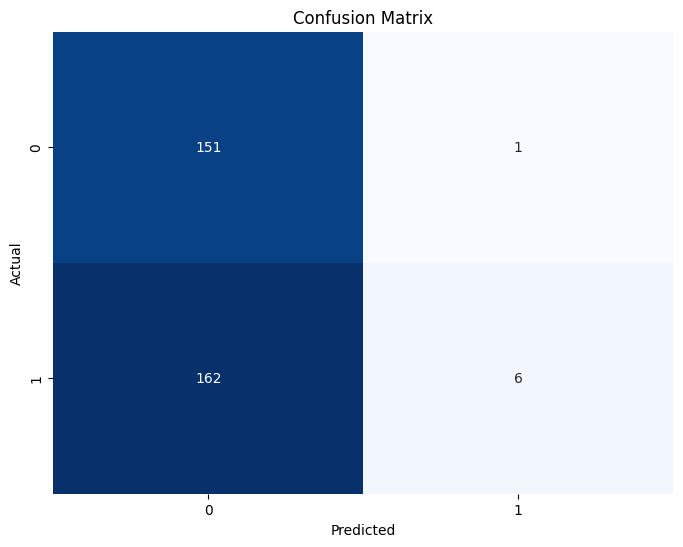

In [17]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()